<a href="https://colab.research.google.com/github/mrtkp9993/FinanceExamplesPy/blob/main/02_cointegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install arch

In [54]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller, coint

In [4]:
stocks = [
          'KCHOL.IS',
          'AYGAZ.IS',
          'FROTO.IS',
          'MAALT.IS',
          'OTKAR.IS',
          'TATGD.IS',
          'TOASO.IS',
          'ARCLK.IS',
          'TTRAK.IS',
          'TUPRS.IS',
          'YKBNK.IS',
          'YKGYO.IS'
          ]

In [44]:
df = yf.download(stocks, start="2013-01-01")
df = df['Adj Close']
df.fillna(method="pad", inplace=True)

[*********************100%***********************]  12 of 12 completed


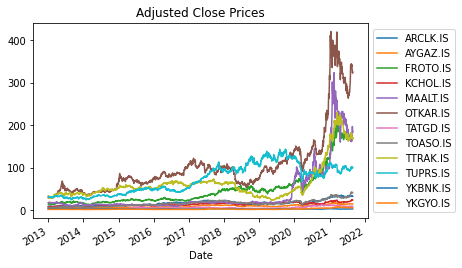

In [45]:
f = plt.figure()
plt.title('Adjusted Close Prices', color='black')
df.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

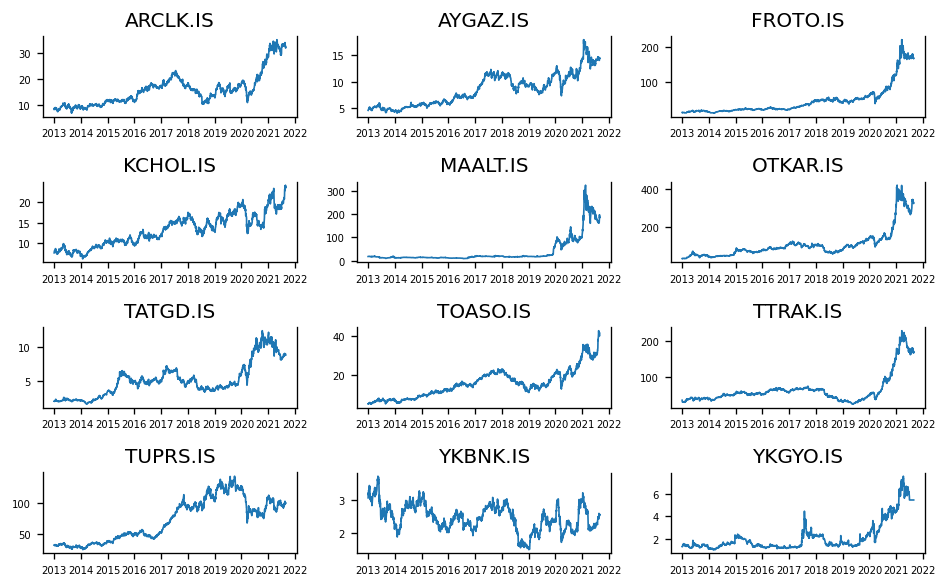

In [46]:
fig, axes = plt.subplots(nrows=4, ncols=3, dpi=120, figsize=(8,5))
for i, ax in enumerate(axes.flatten()):
  data = df[df.columns[i]]
  ax.plot(data, linewidth=1)
  ax.set_title(df.columns[i])
  ax.spines["top"].set_alpha(0)
  ax.tick_params(labelsize=6)
plt.tight_layout();

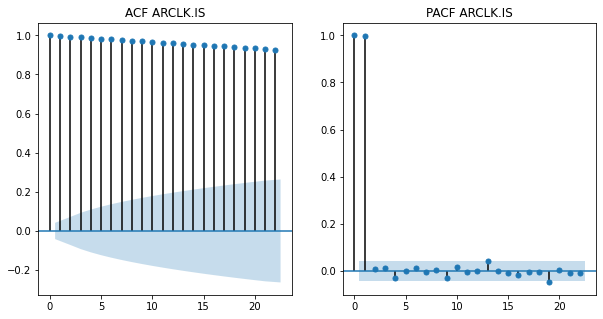

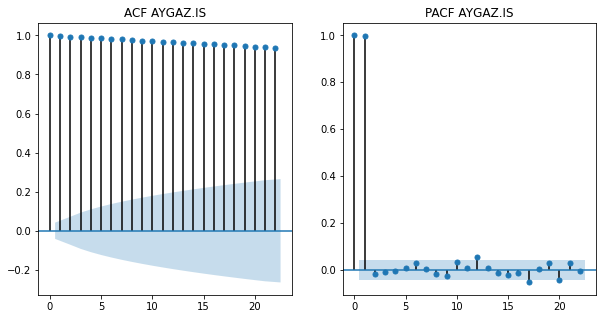

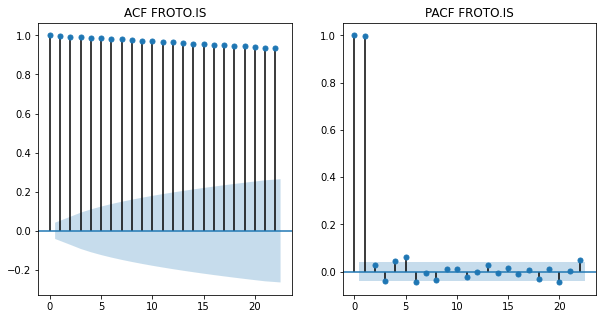

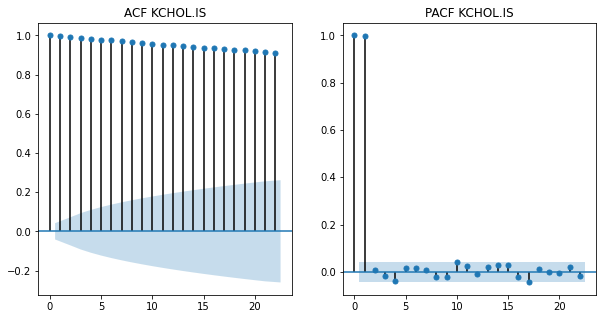

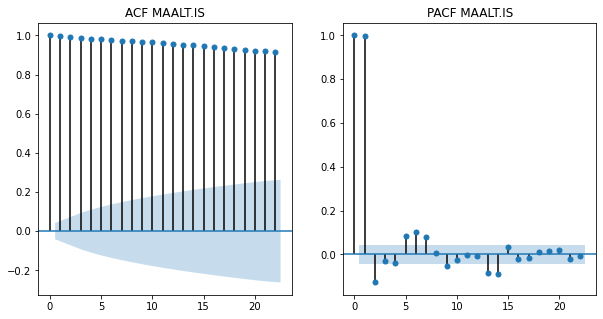

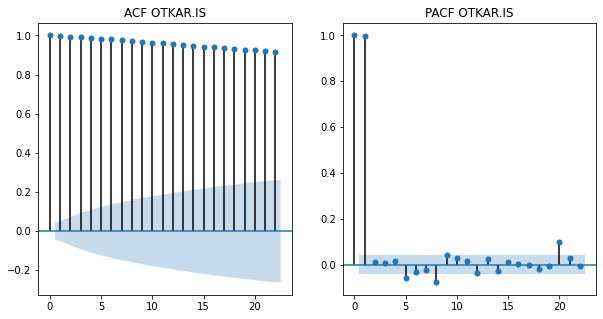

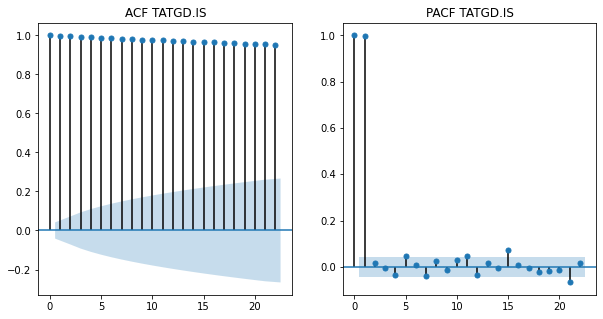

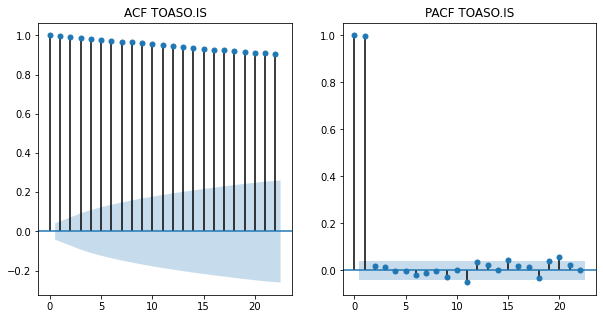

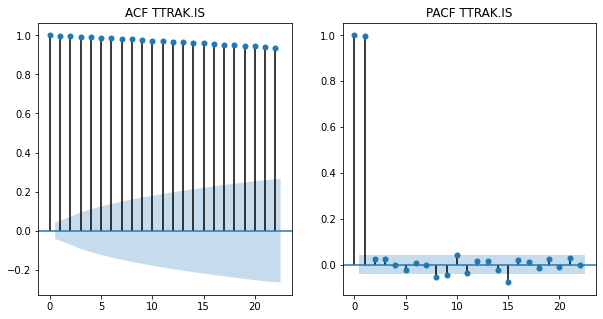

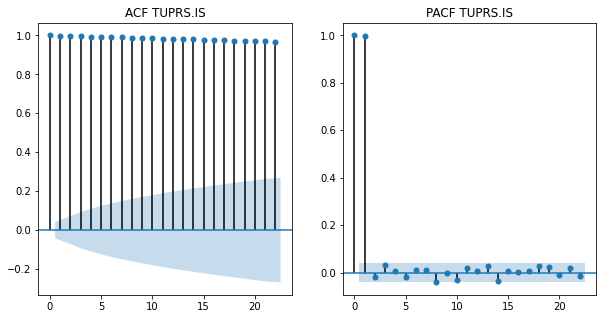

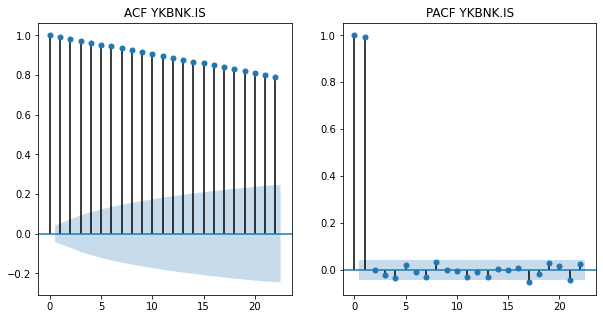

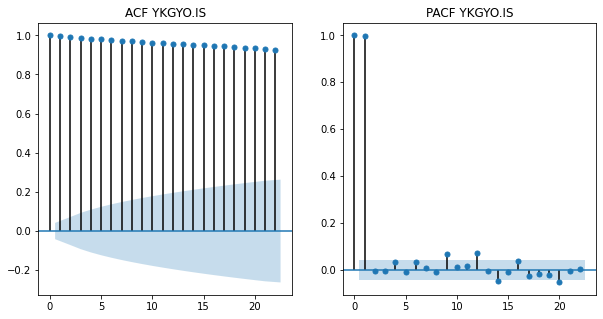

In [50]:
for i in df.columns:
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  plot_acf(df[i].values.squeeze(), lags=22, ax=ax[0], title=f"ACF {i}")
  plot_pacf(df[i].values.squeeze(), lags=22, ax=ax[1], title=f"PACF {i}")
  plt.show()

In [51]:
for i in df:
  res = adfuller(df[i])
  print(f'ADF Statistic for {i}: {res[0]}')
  print(f'p-value: {res[1]}')

ADF Statistic for ARCLK.IS: -0.128141530565146
p-value: 0.9465623837102239
ADF Statistic for AYGAZ.IS: -0.8750077525078817
p-value: 0.796091282103438
ADF Statistic for FROTO.IS: 1.7433636254532878
p-value: 0.9982298174871012
ADF Statistic for KCHOL.IS: -0.6762468290004842
p-value: 0.852806589066295
ADF Statistic for MAALT.IS: -0.6715917576579711
p-value: 0.8539713445418992
ADF Statistic for OTKAR.IS: -0.23555519117635615
p-value: 0.9341486921670319
ADF Statistic for TATGD.IS: -1.056309727208335
p-value: 0.7321770747636773
ADF Statistic for TOASO.IS: 0.9599645069338612
p-value: 0.9938250414310913
ADF Statistic for TTRAK.IS: -0.02980551500801977
p-value: 0.9559966784892966
ADF Statistic for TUPRS.IS: -1.2343361911029915
p-value: 0.658653553431206
ADF Statistic for YKBNK.IS: -3.2657320757806456
p-value: 0.016481488164316133
ADF Statistic for YKGYO.IS: -0.39950231916305146
p-value: 0.9101818390868464


In [55]:
for s1 in df.columns:
  for s2 in df.columns:
    if s1 != s2:
      res = coint(df[s1], df[s2], trend="nc")
      pval = res[1]
      if pval <= 0.05:
        print(f"{s1} and {s2} has cointegration, p-value: {pval}")

ARCLK.IS and TOASO.IS has cointegration, p-value: 0.033761137598324054
AYGAZ.IS and KCHOL.IS has cointegration, p-value: 0.00985554706197596
FROTO.IS and MAALT.IS has cointegration, p-value: 0.017424050879947108
FROTO.IS and OTKAR.IS has cointegration, p-value: 0.005106471442983433
KCHOL.IS and AYGAZ.IS has cointegration, p-value: 0.010729779340212027
MAALT.IS and FROTO.IS has cointegration, p-value: 0.007293657656406884
OTKAR.IS and FROTO.IS has cointegration, p-value: 0.0034853074546321887
OTKAR.IS and TTRAK.IS has cointegration, p-value: 0.03834703058808697
OTKAR.IS and YKGYO.IS has cointegration, p-value: 0.0021396309338142334
TOASO.IS and ARCLK.IS has cointegration, p-value: 0.04936627864723009
TTRAK.IS and OTKAR.IS has cointegration, p-value: 0.03448231999627479
TTRAK.IS and YKGYO.IS has cointegration, p-value: 0.03704314391839787
YKGYO.IS and OTKAR.IS has cointegration, p-value: 0.0013918809767964606
YKGYO.IS and TTRAK.IS has cointegration, p-value: 0.026633822679746733
